# Analysis and estimation of duration distributions in empirical data

In [1]:
import pomegranate
import numpy as np
import pandas as pd

In [4]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is AEF6-2859

 Directory of C:\Users\Mike\Norwegian University of Life Sciences\Joachim Scholderer - Teaching\PhD Mike\Papers\CRM process improvement paper (In progress)\Data\Data\Strata_Train_NPS_cases

04/01/2022  11:02    <DIR>          .
04/01/2022  11:02    <DIR>          ..
04/01/2022  11:02    <DIR>          .ipynb_checkpoints
04/01/2022  10:44         6,957,930 Activity_durations_data_cleaning.ipynb
21/12/2021  12:33         7,540,371 Activity_durations_initial_look.ipynb
22/12/2021  16:50           105,223 Activity_durations_modelling.ipynb
19/04/2021  10:43           256,897 Train_NPS_caselvl.csv
19/04/2021  10:32         1,281,941 Train_NPS_evlog.csv
               5 File(s)     16,142,362 bytes
               3 Dir(s)  91,205,677,056 bytes free


In [3]:
df = pd.read_csv("Train_NPS_evlog.csv")

In [4]:
df['date_task_created'] = pd.to_datetime(df['date_task_created']) #, format='%Y-%m-%d %H:%M:%S'
df['date_case_created'] = pd.to_datetime(df['date_case_created'])
df['date_case_closed'] = pd.to_datetime(df['date_case_closed'])
df['nps_createddate'] = pd.to_datetime(df['nps_createddate'])
df

,case_id,case_type,task_id,task_tasksubtype,ressource,ressource_role,case_owner_role,case_topic,case_requires_rework__c,case_closure_code__c,...,task_count,task_number,date_case_created,date_case_closed,date_task_created,year,month,day,weekday,hour
0,1485898,Service Request,1,Email,y_7,b_1,b_1,d_2,False,Changed subscription,...,2,1,2018-02-12 11:40:54,2018-02-18 23:01:09+00:00,2018-02-12 11:42:22+00:00,2018,2,12,0,11
1,1485898,Service Request,2,Email,y_7,b_1,b_1,d_2,False,Changed subscription,...,2,2,2018-02-12 11:40:54,2018-02-18 23:01:09+00:00,2018-02-12 11:57:20+00:00,2018,2,12,0,11
2,1491822,Service Request,5,Email,y_9,i_1,i_1,d_2,False,Information/guidance given,...,3,1,2018-02-20 10:17:59,2018-03-05 23:00:51+00:00,2018-02-20 10:20:20+00:00,2018,2,20,1,10
3,1491822,Service Request,10,Email,y_9,i_1,i_1,d_2,False,Information/guidance given,...,3,2,2018-02-20 10:17:59,2018-03-05 23:00:51+00:00,2018-02-21 11:19:09+00:00,2018,2,21,2,11
4,1491822,Service Request,19,Email,y_9,i_1,i_1,d_2,False,Information/guidance given,...,3,3,2018-02-20 10:17:59,2018-03-05 23:00:51+00:00,2018-02-23 10:30:44+00:00,2018,2,23,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,2116343,Service Request,5444,Interaction,w_7,b_1,b_1,z_3,False,Information/guidance given,...,3,1,2019-12-17 11:37:07,2019-12-23 23:01:33+00:00,2019-12-17 11:35:48+00:00,2019,12,17,1,11
5452,2116343,Service Request,5445,Email,w_7,b_1,b_1,z_3,False,Information/guidance given,...,3,2,2019-12-17 11:37:07,2019-12-23 23:01:33+00:00,2019-12-17 11:38:02+00:00,2019,12,17,1,11
5453,2116343,Service Request,5453,Email,w_7,b_1,b_1,z_3,False,Information/guidance given,...,3,3,2019-12-17 11:37:07,2019-12-23 23:01:33+00:00,2019-12-17 12:56:26+00:00,2019,12,17,1,12
5454,2116433,Service Request,5449,Interaction,w_7,b_1,b_1,z_3,False,Added new product,...,2,1,2019-12-17 12:26:32,2019-12-23 23:00:33+00:00,2019-12-17 12:19:01+00:00,2019,12,17,1,12


In [5]:
df.columns

Index(['case_id', 'case_type', 'task_id', 'task_tasksubtype', 'ressource',
       'ressource_role', 'case_owner_role', 'case_topic',
       'case_requires_rework__c', 'case_closure_code__c',
       'case_milestonestatus', 'case_resolution_time__c', 'nps_createddate',
       'nps_response_complete', 'nps_promoter', 'nps_detractor',
       'nps_response_value', 'task_count', 'task_number', 'date_case_created',
       'date_case_closed', 'date_task_created', 'year', 'month', 'day',
       'weekday', 'hour'],
      dtype='object')

## Inspection: case level

<AxesSubplot:>

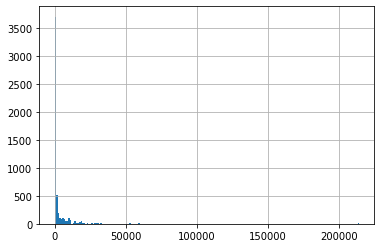

In [6]:
df.case_resolution_time__c.hist(bins=200)

## Inspection: cases with only one activity

In [7]:
sub = df.loc[df.task_count < 2]
sub.head()

,case_id,case_type,task_id,task_tasksubtype,ressource,ressource_role,case_owner_role,case_topic,case_requires_rework__c,case_closure_code__c,...,task_count,task_number,date_case_created,date_case_closed,date_task_created,year,month,day,weekday,hour


# Get duration per task

In [8]:
cases = list(set(df.case_id.values))
print(len(cases))

1898


In [9]:
#placeholder for all rows
evlog = []

#go over all cases
for caseid in cases:
    
    #subset the case
    sub_case = df.loc[df.case_id == caseid]
    
    print(str(caseid),"len:",str(len(sub_case)))
    
    sub_case.index = list(range(0,len(sub_case)))
    
    #if more than one activity, calculate time between
    if len(sub_case) > 1:
        
        #go over each activity
        for t in sub_case.index:
            #print(t)
            activity_start = sub_case.loc[t].date_task_created
            
            #if next activity is not last activity, get next timestep
            if t+1 < len(sub_case):
                next_activity_start = sub_case.loc[t+1].date_task_created
                
            #if next activity is the last activity, use closed date
            else:
                next_activity_start = sub_case.loc[t].date_case_closed
            
            #calculate difference between events, and get duration:
            duration = next_activity_start - activity_start
            duration = duration.total_seconds()/60/60 #hours
            
            #if duration is invalid, dont include the activity
            if duration >= 0:

                #activity-timestep pair
                sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)

                #append results
                sub_case["activity_duration_hrs"] = duration
                evlog.append(sub_case)
    
    #if length is only one, use custom duration
    else:
        
        activity_start = sub_case.loc[0].date_task_created
        
        next_activity_start = sub_case.loc[0].date_case_closed
        
        #calculate difference between events, and get duration:
        duration = next_activity_start - activity_start

        if duration.days >= 0:
            #activity-timestep pair
            sub_case["activity_timestep"] = str(sub_case.loc[0].task_number) + "_" + str(sub_case.loc[0].task_tasksubtype)

            #append results
            sub_case["activity_duration_hrs"] = duration.total_seconds()/60/60
            evlog.append(sub_case)
        
evlog_df = pd.concat(evlog, ignore_index=True)
evlog_df

1925130 len: 3
2048019 len: 2
2048029 len: 2
1695777 len: 2
1966114 len: 2
1990691 len: 2
1941540 len: 2
2105391 len: 2
1925168 len: 3
2048049 len: 2
1548338 len: 3
2105395 len: 3
2048053 len: 2
1810486 len: 2
1925176 len: 3
1761337 len: 4
1761344 len: 2
1728578 len: 3
2064456 len: 4
2080845 len: 2
1925210 len: 3
2105447 len: 5
1728616 len: 3
1704041 len: 2
2097258 len: 2
1548397 len: 8
2080883 len: 3
2064500 len: 6
2105459 len: 2
1704067 len: 2
1925252 len: 3
1925257 len: 3
2064526 len: 14
2015376 len: 2
2023570 len: 2
1990816 len: 11
1859748 len: 3
2048166 len: 4
2015412 len: 3
1720505 len: 2
1695931 len: 2
2040000 len: 2
1548484 len: 2


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1884361 len: 4
2031825 len: 2
2040019 len: 2
1990871 len: 3
2031845 len: 2
1974503 len: 4
2097387 len: 2
2072814 len: 3
1704176 len: 3
2105587 len: 2
1548538 len: 2
1974522 len: 4
1974525 len: 2
1974527 len: 5
2097414 len: 2
1859849 len: 3
1736978 len: 10
2064658 len: 2
2072850 len: 2
1728790 len: 3
1704219 len: 2
2072861 len: 2
1859872 len: 2
2064684 len: 4
1974580 len: 2
2048308 len: 2
2056501 len: 4
1990974 len: 4
2056514 len: 4
2015560 len: 2
1859913 len: 3
1941833 len: 3
2064713 len: 2
2105682 len: 3
1728859 len: 3
1941857 len: 4
2015588 len: 5
2048356 len: 11
2048366 len: 3
1941873 len: 2
1900920 len: 2
2023811 len: 3
2048407 len: 3
1900952 len: 3
1900955 len: 2


<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

2072990 len: 3
1491365 len: 2
1860014 len: 3
2113995 len: 2
2015694 len: 2
2023897 len: 2
2064860 len: 3
2040287 len: 4
1941984 len: 3
1860066 len: 6
2097635 len: 2
1737188 len: 4
2048485 len: 2
1761782 len: 3
1974777 len: 3
2048505 len: 2
1729021 len: 2
2015746 len: 2
2023940 len: 3
1901064 len: 2
1901065 len: 2
2097675 len: 5
1974796 len: 2
1917453 len: 2
1737233 len: 2
1729042 len: 2
1925664 len: 2
1548838 len: 2
1761841 len: 3
2114098 len: 2
2073139 len: 3
2114104 len: 2
2081337 len: 3
2097736 len: 4
2015820 len: 2
2097742 len: 3
2048596 len: 2
1901152 len: 2
1761900 len: 2
1737325 len: 3
2105966 len: 2
2105976 len: 5
2024059 len: 2
1901180 len: 3
2097788 len: 2
2024067 len: 2
2105989 len: 3
1737355 len: 2
1761932 len: 2
1991317 len: 2
1925797 len: 3


<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1925798 len: 2
1983143 len: 2
2048677 len: 5
2114218 len: 2
2015916 len: 2
1917620 len: 3
1974964 len: 3
1548989 len: 2
2106049 len: 4
1548994 len: 2
1737417 len: 3
2040522 len: 2
1549013 len: 3
1753817 len: 2
2032346 len: 3
2024158 len: 2
1729248 len: 5
2024165 len: 4
1712879 len: 2
2065138 len: 3
2007799 len: 3
2048759 len: 3
2106103 len: 3
2081531 len: 2
2032381 len: 2
2040578 len: 2
2097926 len: 2
2081546 len: 3
1983244 len: 3
1983245 len: 2
1696529 len: 2
1917716 len: 3
1704734 len: 2
1925925 len: 2
2007846 len: 2
2024231 len: 3
1729323 len: 2
2048817 len: 2
1688379 len: 2
1917757 len: 3
2114366 len: 3
1712963 len: 3
1688392 len: 3
1729354 len: 2
1917771 len: 3
1688398 len: 3
1991502 len: 3
1647448 len: 2
1688424 len: 3
1491822 len: 3
2081647 len: 3


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1549168 len: 4
1917820 len: 2
1803134 len: 2
2081669 len: 2
1991563 len: 3
2032535 len: 3
2040731 len: 2
2024351 len: 3
2024357 len: 5
1917866 len: 2
1737647 len: 2
2106314 len: 3
2098139 len: 2
1647581 len: 2
1541089 len: 2
1909730 len: 2
1549283 len: 3
1991649 len: 3
1647590 len: 2
2114538 len: 4
1917936 len: 2
1819634 len: 2
2065401 len: 2
1819647 len: 5
1704962 len: 3
2016258 len: 2
1704968 len: 6
1721367 len: 3
1713177 len: 2
1983528 len: 3
1688617 len: 2
1991721 len: 3
1688622 len: 2
2032691 len: 3
1786932 len: 2
1492023 len: 3
1647672 len: 3
1729593 len: 2
1762361 len: 2
1705024 len: 2
1696833 len: 2
1918028 len: 3
2065486 len: 3
1803351 len: 2
1688668 len: 2
2016349 len: 2
1696862 len: 3
1918046 len: 3
1639526 len: 4
2040943 len: 3
1909874 len: 2


<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

2008178 len: 2
2024567 len: 3
1705080 len: 2
1549434 len: 2
2049146 len: 2
2049152 len: 3
1492100 len: 2
1688708 len: 3
2106505 len: 3
2073739 len: 4
1729680 len: 16
1721494 len: 3
2016407 len: 3
2106520 len: 2
1819817 len: 3
1696938 len: 2
2065584 len: 3
1942705 len: 3
2008250 len: 2
1811644 len: 4
1983678 len: 7
1647811 len: 2
1926343 len: 2
1762509 len: 3
2082001 len: 3
1909973 len: 3
1696984 len: 6
2016479 len: 5
2016482 len: 3
1696995 len: 2
2032870 len: 3
1762536 len: 3
1803498 len: 2
2082027 len: 2
2049261 len: 3
2024693 len: 4
1705216 len: 2
1942784 len: 3
2016514 len: 2
2024704 len: 2
2041088 len: 4
2008330 len: 2
2065683 len: 3
2098457 len: 2
2098458 len: 3


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

2008350 len: 3
1967399 len: 3
1942836 len: 3
1729845 len: 2
2073914 len: 3
2057539 len: 11
1942852 len: 2
2065735 len: 2
2098503 len: 3
1910094 len: 2
1803601 len: 4
2073940 len: 3
1688918 len: 3
1721686 len: 3
1942873 len: 4
1942878 len: 3
1803618 len: 2
1697127 len: 2
2016621 len: 4
1647986 len: 3
2057589 len: 2
2098556 len: 3
1942909 len: 2
1762686 len: 2
2098561 len: 3
1721730 len: 3
1983884 len: 4
1705358 len: 3
2049423 len: 3
2016658 len: 2
2041236 len: 5
2008470 len: 2
2024864 len: 5
1803692 len: 3
1787312 len: 3
2041264 len: 3
1721779 len: 3
2114996 len: 3
1803699 len: 2
1787318 len: 4
2074042 len: 3
2049473 len: 2
1787334 len: 2
2049479 len: 4
1934803 len: 3
1689059 len: 2
2115043 len: 3
2057705 len: 6
1934828 len: 3
2082287 len: 2
1918456 len: 3
1721852 len: 2
1762817 len: 3
1549829 len: 3
1934863 len: 2
2074127 len: 3
2115097 len: 2
1943066 len: 3
2033179 len: 2
1697316 len: 4
2074150 len: 2
1697324 len: 3
1984044 len: 2
1893935 len: 3
1803826 len: 2
1689145 len: 2
2074169 l

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1550040 len: 2
2082524 len: 5
2041570 len: 3
2098915 len: 3
2098921 len: 2
1730283 len: 3
1984235 len: 2
2115320 len: 2
2107132 len: 4
1763076 len: 2
2025224 len: 2
2098960 len: 3
1984274 len: 2
1550099 len: 3
2082579 len: 3
1804055 len: 2
1754918 len: 2
1894182 len: 4
1550120 len: 3
1812266 len: 4
1894193 len: 9
1910578 len: 3
1902396 len: 2
2099012 len: 2
1976136 len: 3
1992521 len: 3
1943370 len: 7
1550161 len: 2
2099026 len: 4
1902417 len: 2
1697620 len: 2
2025297 len: 2
1705820 len: 3
1754980 len: 3
1910632 len: 7
1763183 len: 3
1910643 len: 3
2049909 len: 3
1648506 len: 2
1804154 len: 11
1910655 len: 2
1812353 len: 2
1976197 len: 3
1689479 len: 6
2115465 len: 2
1902474 len: 2
2049930 len: 3


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

2000784 len: 2
1918868 len: 3
1763221 len: 3
1943448 len: 3
1918882 len: 4
2041762 len: 3
1550244 len: 4
1804199 len: 3
2041772 len: 3
2009007 len: 3
2009021 len: 5
1648574 len: 2
2107329 len: 3
1992648 len: 2
2049999 len: 2
1550291 len: 3
1705940 len: 2
2115541 len: 3
2066392 len: 4
1755104 len: 2
1755108 len: 3
2017253 len: 2
1689579 len: 2
1550321 len: 2
2074611 len: 2
2025460 len: 3
2050037 len: 2
2025465 len: 2
1705992 len: 2
1755154 len: 2
1902612 len: 2
1910808 len: 3
1812506 len: 3
2017312 len: 3
2115625 len: 2
1984563 len: 3
1902644 len: 2
1976372 len: 3
1689661 len: 2
1730622 len: 3
1902657 len: 3
1820738 len: 4
1689669 len: 2
1804361 len: 4
1697874 len: 2
2107475 len: 2
2107477 len: 2
2107478 len: 3
1722457 len: 3
1730649 len: 3
2082908 len: 4
2017373 len: 2
1820773 len: 2
1919077 len: 9
2074725 len: 3
1706095 len: 3
2017391 len: 3
2058360 len: 2
1976448 len: 2
2033796 len: 4
1820805 len: 2
1902726 len: 2
1804435 len: 2
1804436 len: 4
1648792 len: 2
1714334 len: 2
1722539 le

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

2009336 len: 2
2107637 len: 4
2001147 len: 2
2107651 len: 2
2099461 len: 2
1722630 len: 2
1763590 len: 3
2009351 len: 2
1706249 len: 2
1698062 len: 2
2025746 len: 2
2050323 len: 4
2083092 len: 4
1550613 len: 2
1698078 len: 2
1493279 len: 5
2042146 len: 2
1722659 len: 3
1689893 len: 3
1747237 len: 3
1550631 len: 3
1984811 len: 2
1919280 len: 2
1902906 len: 15
2115898 len: 2
2115913 len: 5
1714509 len: 3
1993042 len: 3
2034002 len: 2
1730905 len: 2
1976665 len: 3
1706333 len: 2
2083175 len: 2
1763688 len: 3
1984873 len: 3
1894764 len: 4
1730927 len: 3
1689969 len: 3
1706356 len: 2
2025844 len: 4
1943928 len: 2
2050424 len: 2
1689980 len: 2
1689984 len: 6
2115971 len: 2
1902984 len: 4
2115977 len: 3


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

2066846 len: 2
1550756 len: 3
1903015 len: 2
1894825 len: 2
2083242 len: 2
1943979 len: 3
2066857 len: 3
2116015 len: 2
1706420 len: 2
1698235 len: 2
2116031 len: 2
1903043 len: 2
2058696 len: 2
1919433 len: 2
1690058 len: 2
1706451 len: 3
1911258 len: 2
2009567 len: 4
1550823 len: 4
1550827 len: 3
1944049 len: 3
1985015 len: 3
2050551 len: 2
1632761 len: 3
1985027 len: 2
1985028 len: 3
1993222 len: 3
1894924 len: 2
1632782 len: 3
1731090 len: 2
1919508 len: 2
2026004 len: 2
2066965 len: 2
2017817 len: 3
1731101 len: 2
2034215 len: 2
1698347 len: 3
1894964 len: 4
1985078 len: 2
2058806 len: 3
1731129 len: 4
2042426 len: 3
2026043 len: 2
1944127 len: 7
2058817 len: 4
2099782 len: 3
1649228 len: 3
2009679 len: 3
1731158 len: 3
1976918 len: 2
2017886 len: 2


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1985132 len: 2
1550957 len: 2
1690222 len: 2
2050674 len: 2
1698421 len: 2
2058870 len: 2
1649272 len: 2
1780348 len: 2
1919613 len: 3
1739390 len: 3
1976960 len: 3
2108032 len: 4
1690243 len: 3
1550982 len: 3
1690246 len: 8
1903255 len: 4
2067098 len: 2
1690279 len: 6
2099879 len: 2
1551035 len: 2
2099906 len: 4
2067139 len: 2
1944261 len: 2
2042567 len: 3
1731278 len: 4
1723088 len: 3
1731290 len: 3
2058975 len: 4
1895137 len: 2
1632995 len: 3
1985254 len: 3
2075366 len: 8
2083568 len: 2
1936113 len: 2
1649394 len: 4
2116341 len: 3
2116343 len: 3
1944317 len: 2
1633024 len: 2
2075397 len: 2
1657609 len: 3
1633034 len: 3
1690381 len: 6
1919765 len: 9
2083607 len: 2
2116376 len: 3
2108195 len: 2


<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1731365 len: 2
1936165 len: 5
2075429 len: 2
1698600 len: 4
1633065 len: 4
2059050 len: 2
1755947 len: 2
1944364 len: 4
2034478 len: 2
1944368 len: 2
1731379 len: 4
1542966 len: 2
1805110 len: 3
1723192 len: 2
1985334 len: 2
2108216 len: 3
2075449 len: 2
1903425 len: 2
1985345 len: 2
1649475 len: 2
1977164 len: 3
2034511 len: 2
2067280 len: 2
2116433 len: 2
2100054 len: 2
1649497 len: 3
1788762 len: 2
1551196 len: 4
2075485 len: 2
1633122 len: 5
2009956 len: 2
1493868 len: 2
1649519 len: 2
1788783 len: 3
1805171 len: 4
1731445 len: 2
1551226 len: 2
1977212 len: 2
1739645 len: 3
1706878 len: 2
1756037 len: 2
1895303 len: 3
2100114 len: 3
1706901 len: 2
2010011 len: 4
2010016 len: 3
1739689 len: 4
1543090 len: 2
1633206 len: 3
1780664 len: 2
1739708 len: 2


<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

2091965 len: 2
1543107 len: 3
1944515 len: 2
2067399 len: 2
1698760 len: 2
2091977 len: 2
1805261 len: 2
2067407 len: 2
2018257 len: 2
2018258 len: 2
1633237 len: 3
1706972 len: 2
1805277 len: 3
2091997 len: 2
1715167 len: 3
1633251 len: 3
1715172 len: 4
1715171 len: 2
2067436 len: 2
2100207 len: 2
1903614 len: 3
1903621 len: 3
1936389 len: 2
1805319 len: 3
1707017 len: 2
1903625 len: 2
1977357 len: 4
2100247 len: 5
1920025 len: 3
1690651 len: 2
1723419 len: 3
1731613 len: 2
1707038 len: 3
1993760 len: 2
1494049 len: 2
1805346 len: 4
1977384 len: 5
2001962 len: 2
1985579 len: 2
1944621 len: 3
1805358 len: 2
1690671 len: 3
1936431 len: 4
1502266 len: 2
1723458 len: 2
1756226 len: 6
1805382 len: 3
1944647 len: 2
1485898 len: 2
2010187 len: 4
2018392 len: 5
1723487 len: 3


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1805408 len: 2
1977440 len: 3
1846369 len: 5
2075748 len: 2
2051175 len: 2
1977451 len: 2
2075757 len: 4
1961072 len: 12
1813618 len: 2
2075767 len: 2
2067577 len: 3
2026618 len: 6
2108543 len: 2
2026625 len: 3
1846403 len: 2
1961091 len: 2
1543301 len: 2
2067596 len: 2
1690766 len: 4
1723535 len: 5
1961115 len: 2
2051231 len: 4
1969313 len: 3
1936551 len: 2
1707186 len: 3
2018482 len: 2
1780917 len: 2
2108601 len: 2
1649856 len: 3
1993920 len: 3
1780929 len: 2
2108609 len: 2
1723596 len: 5
2075854 len: 2
2067665 len: 4
1846485 len: 2
1707226 len: 3
1780959 len: 5
2108641 len: 3
1944803 len: 2
1658087 len: 2
2075883 len: 5
1805553 len: 2
1805574 len: 3
2051337 len: 3
2075923 len: 4
1805588 len: 3
1969428 len: 3
1985818 len: 2
1895707 len: 3
1846556 len: 3
1846558 len: 3
2075937 len: 4
1887524 len: 6
1715495 len: 3
1715496 len: 3
1936682 len: 2
2084140 len: 2
1690929 len: 2
2067771 len: 2
1887551 len: 2
2067780 len: 3
1944904 len: 2
1707344 len: 2
1953105 len: 2
1920339 len: 3
2075988 l

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

2010556 len: 3
1895871 len: 3
1945026 len: 4
1723843 len: 3
1985991 len: 3
1658313 len: 3
1985999 len: 2
1723860 len: 2
1658343 len: 5
1723884 len: 3
1650160 len: 4
1994233 len: 3
1781242 len: 4
2108922 len: 3
1740291 len: 4
1691140 len: 2
1822211 len: 3
1904134 len: 4
1887754 len: 3
1945098 len: 3
1633809 len: 3
1953322 len: 3
2068010 len: 4
1814062 len: 3
2059828 len: 2
2068022 len: 2
1936954 len: 6
1969744 len: 2
1691217 len: 2
2010707 len: 6
1650271 len: 3
1658463 len: 2
1904223 len: 4
1740393 len: 3
2100848 len: 4
1650291 len: 2
1707635 len: 2
1691257 len: 2
2027131 len: 3
2059901 len: 3
1822338 len: 2
1715843 len: 5
1986181 len: 4
1691273 len: 2
2051721 len: 3
1756812 len: 2
1953426 len: 2
1904275 len: 4
1937044 len: 3


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1724064 len: 3
1658532 len: 2
1805988 len: 3
2100902 len: 2
2035378 len: 2
1920692 len: 2
1920700 len: 2
1633982 len: 2
1756870 len: 2
1896151 len: 2
1724122 len: 3
1724123 len: 2
1887963 len: 3
1986269 len: 3
1814245 len: 4
2027240 len: 3
1814262 len: 3
1847044 len: 2
1912580 len: 2
1978116 len: 2
1740549 len: 2
1912583 len: 3
2101010 len: 2
1986323 len: 3
1961756 len: 3
2101021 len: 3
1953571 len: 3
2101032 len: 3
1978161 len: 3
2109250 len: 2
1806159 len: 2
1888080 len: 2
1757009 len: 4
1634130 len: 2
2101076 len: 3
1724249 len: 2
1716062 len: 4
1740639 len: 3
1847138 len: 2
2076518 len: 2
1847144 len: 3
1806187 len: 2
1724268 len: 3
2027373 len: 3
1503086 len: 2
2076523 len: 2
2092907 len: 2
2092913 len: 3
1740660 len: 2
1904501 len: 3
2092919 len: 3
1503099 len: 2


<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1716091 len: 3
1740670 len: 2
1937282 len: 3
1814405 len: 2
2051981 len: 2
1757071 len: 3
2092944 len: 2
1822620 len: 4
1822631 len: 3
2109354 len: 6
1658798 len: 5
1732529 len: 7
2109364 len: 2
2043829 len: 2
1806271 len: 2
2027455 len: 3
1707972 len: 3
1748932 len: 2
1929160 len: 2
2109396 len: 2
1806304 len: 2
1920992 len: 5
2093026 len: 2
1929188 len: 3
1650665 len: 3
1929198 len: 3
2093050 len: 3
1716226 len: 2
2027522 len: 2
1716231 len: 3
1904648 len: 2
1929225 len: 3
2027527 len: 3
2076679 len: 3
1814541 len: 3
1650703 len: 2
1929248 len: 2
1749029 len: 2
1814570 len: 3
2052141 len: 3
1650736 len: 4
1904688 len: 2
1978420 len: 3
1716292 len: 5
1986631 len: 4
1929288 len: 3
2035789 len: 2
1724498 len: 2
2019410 len: 2
1790036 len: 2
1847379 len: 4


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1544279 len: 2
1740895 len: 3
2019425 len: 2
1552482 len: 3
1724515 len: 2
1888356 len: 2
1847404 len: 3
2109548 len: 2
2035822 len: 2
1937520 len: 2
2011254 len: 3
1806458 len: 3
1986682 len: 3
1699964 len: 4
2011275 len: 2
2035852 len: 2
2060439 len: 3
1847449 len: 2
1716380 len: 2
1970334 len: 2
1921188 len: 3
2060453 len: 2
1659051 len: 3
2044080 len: 3
1650865 len: 4
1749182 len: 2
2060478 len: 4
1740991 len: 11
2076871 len: 2
1847504 len: 2
1659096 len: 2
1552602 len: 2
2085083 len: 2
2060517 len: 4
2060518 len: 2
1552616 len: 4
1749225 len: 2
1986800 len: 2
2019570 len: 3
1552627 len: 3
1757428 len: 2
2035958 len: 2
1913082 len: 2
1978618 len: 2
1847547 len: 3
1806590 len: 2
1978625 len: 2
1806596 len: 2
2027780 len: 3
1552648 len: 2
1552650 len: 2
2109717 len: 3
1716507 len: 2
1847586 len: 4
1978658 len: 2
1913124 len: 3
1847590 len: 2
1847592 len: 2
1757482 len: 3
2044208 len: 6
1634618 len: 3
1978682 len: 3
1724732 len: 3
1913148 len: 3
2109767 len: 3
1978697 len: 5
1716554 l

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1659394 len: 3
2109964 len: 3
1749528 len: 3
1724955 len: 2
2052636 len: 2
1806878 len: 3
2069022 len: 3
1937952 len: 6
2109983 len: 3
1724962 len: 4
1806883 len: 3
1552932 len: 3
1634853 len: 3
1847856 len: 2
1897016 len: 3
1634874 len: 3
1897027 len: 2
1741380 len: 2
1782349 len: 2
1741392 len: 4
2044502 len: 3
1503831 len: 3
1897055 len: 4
1938016 len: 3
1749602 len: 2
1757794 len: 2
1757801 len: 5
2036332 len: 2
1897072 len: 2
1544818 len: 2
1757813 len: 2
1979001 len: 4
2052730 len: 5
1987196 len: 4
1725060 len: 3
2085510 len: 3
1888905 len: 3
1659534 len: 3
1544853 len: 3
1757853 len: 3
1888928 len: 2
2020001 len: 2
2036389 len: 2
2093737 len: 3
2052778 len: 2
1708717 len: 2
2036397 len: 3
1888943 len: 2
1807036 len: 2
2093760 len: 2
1782467 len: 5


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

2110148 len: 2
1725128 len: 3
1807048 len: 4
1708754 len: 2
1807060 len: 2
1741533 len: 2
1897182 len: 2
1635052 len: 2
1757940 len: 2
2085621 len: 2
1807100 len: 3
1741565 len: 2
1848062 len: 3
1708806 len: 2
1725191 len: 2
1749771 len: 3
1848076 len: 3
1635099 len: 3
1635106 len: 3
1889063 len: 2
1848106 len: 2
1889066 len: 3
2011950 len: 3
2028334 len: 2
1741617 len: 2
2110261 len: 2
1758012 len: 3
1749826 len: 3
2036553 len: 3
1733451 len: 2
1692492 len: 2
1733452 len: 3
1758028 len: 2
1733461 len: 3
1733470 len: 2
1938270 len: 3
2011999 len: 2


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1553250 len: 3
1643362 len: 4
1725286 len: 3
1659752 len: 3
1717096 len: 3
1938290 len: 2
2093941 len: 3
2093944 len: 3
2093948 len: 3
1962881 len: 3
1553282 len: 2
1692548 len: 3
1545100 len: 2
1553293 len: 2
1553294 len: 2
2061198 len: 2
1692567 len: 3
1692569 len: 2
1708954 len: 4
1807258 len: 4
2061212 len: 3
2085787 len: 2
1553310 len: 3
1651615 len: 2
2028447 len: 2
2028449 len: 2
2053030 len: 2
1741736 len: 3
1733545 len: 2
1962931 len: 4
1749942 len: 2
1807288 len: 3
2028487 len: 2
1749964 len: 3
1741775 len: 2
1553365 len: 3
1905621 len: 2
1553367 len: 2
1897432 len: 2
1807324 len: 2
1807325 len: 2
2110438 len: 2
2003943 len: 2
1553387 len: 2
2036719 len: 2
2085871 len: 3
1987572 len: 2
1741826 len: 3
1807362 len: 3
1553428 len: 2
2110484 len: 3
1635349 len: 2
1553431 len: 3
2110489 len: 2
1725476 len: 2


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

2061350 len: 2
2036779 len: 2
1709101 len: 3
2061362 len: 2
2036791 len: 3
1725498 len: 2
1725503 len: 2
1733695 len: 2
1848383 len: 2
2085957 len: 2
1897543 len: 2
1717321 len: 2
2045008 len: 3
2004050 len: 2
2004051 len: 2
1741914 len: 3
1807455 len: 3
1807456 len: 2
1807458 len: 3
2085991 len: 2
2061416 len: 2
1692780 len: 2
1733743 len: 3
2061428 len: 2
1553529 len: 2
1889404 len: 3
1553554 len: 2
1987748 len: 2
1553573 len: 2
2045098 len: 3
1963181 len: 2
1660079 len: 2
1684666 len: 2
1725626 len: 2
2061508 len: 3
1701065 len: 2
2069713 len: 4
1701077 len: 3
2069719 len: 2
1717466 len: 2
2045146 len: 4
1709276 len: 2
2061531 len: 3
2069726 len: 3
1692901 len: 4
2110702 len: 3
1979639 len: 3
1684728 len: 2
1725694 len: 2
1545471 len: 5
2086146 len: 2
2086148 len: 5
1889550 len: 2
1774865 len: 2


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

2045203 len: 3
1553685 len: 2
1889563 len: 4
1545502 len: 3
2110754 len: 3
2028846 len: 3
2037041 len: 3
1897790 len: 3
1897799 len: 2
1856841 len: 2
1717579 len: 5
1545548 len: 6
2110796 len: 2
1758543 len: 2
2086224 len: 3
1840470 len: 2
1922408 len: 3
1701225 len: 3
1733996 len: 2
2045293 len: 6
1922423 len: 2
1758584 len: 2
1897848 len: 3
1709435 len: 2
1660284 len: 4
2020738 len: 3
1897863 len: 3
1758602 len: 2
1701263 len: 2
1734034 len: 2
1717657 len: 3
2110874 len: 3
1856921 len: 3
1725857 len: 2
1758626 len: 3
1922472 len: 4
1856951 len: 2
2061753 len: 3
1889725 len: 3
1545665 len: 3
1742273 len: 2
1922500 len: 3
2037191 len: 2
1545677 len: 3
1734094 len: 4
2029010 len: 5
1693140 len: 2
2029013 len: 3
1922538 len: 2
1545713 len: 3
1734135 len: 2
1979900 len: 2
1799678 len: 2
2037254 len: 3
1922578 len: 3
1545757 len: 2
1742368 len: 3
1742375 len: 3
1717810 len: 2
2086451 len: 3
1922632 len: 3
1922633 len: 4
2029130 len: 16
2037321 len: 3
1545814 len: 2
1914455 len: 2
2078304 l

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1783576 len: 2
1988376 len: 3
1783578 len: 2
1660701 len: 2
1742626 len: 2
1546019 len: 2
1759018 len: 3
1783594 len: 2
1922858 len: 3
1783598 len: 2
1922864 len: 2
1922868 len: 3
1922881 len: 3
1922883 len: 2
2037577 len: 3
2045771 len: 3
1890128 len: 4
1742677 len: 5
1701722 len: 2
2078556 len: 3
1775457 len: 2
1922924 len: 3
1939317 len: 2
1742712 len: 3
2086778 len: 3
1922948 len: 2
1734534 len: 3
2094990 len: 5
2086807 len: 2
2103191 len: 2
2111390 len: 2
2095007 len: 4
2103200 len: 3
1742753 len: 2
2086822 len: 3
2078633 len: 3
2086827 len: 2
2103213 len: 6
2103214 len: 3
1546163 len: 5
1923000 len: 2
1660861 len: 3
1849279 len: 3
1923008 len: 2
1783747 len: 2
2062283 len: 2
2111436 len: 4
1726413 len: 2
2070484 len: 2
1726425 len: 2
1726429 len: 7


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1726439 len: 3
1923049 len: 3
2086890 len: 2
1775595 len: 3
1726444 len: 2
1923053 len: 2
1726450 len: 3
1923071 len: 4
2078719 len: 2
2045956 len: 3
1693701 len: 3
2054150 len: 3
2054157 len: 3
2111505 len: 3
1734686 len: 2
1546272 len: 2
1783844 len: 4
1955880 len: 2
1726506 len: 3
1726513 len: 3
1660991 len: 2
1693760 len: 3
2046031 len: 3
1914964 len: 3
1955942 len: 3
2111597 len: 2
1955955 len: 2
1759348 len: 4
2087034 len: 7
2103424 len: 3
1939605 len: 3
1759392 len: 2
2054307 len: 3
1857706 len: 2
1546416 len: 3
2062512 len: 3
1693879 len: 3
2062521 len: 3
1546429 len: 5
2029767 len: 3
1661132 len: 5
2029773 len: 2
2095309 len: 3
2095312 len: 2
1980629 len: 2
1661148 len: 2
1734883 len: 5
1726697 len: 2
2046198 len: 2
1915140 len: 4
1906958 len: 4


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1784084 len: 3
2095382 len: 3
2021666 len: 2
1546531 len: 4
1743145 len: 2
1546539 len: 3
1693999 len: 2
1694002 len: 2
1726775 len: 2
1743170 len: 2
2111810 len: 2
1702221 len: 3
1759567 len: 2
2095445 len: 2
2021731 len: 2
1743219 len: 3
2087283 len: 4
2095485 len: 2
1915273 len: 2
1702289 len: 3
1702293 len: 4
2111895 len: 2
1710489 len: 3
1743261 len: 2
2087330 len: 3
1546663 len: 3
2029991 len: 3
1661353 len: 6
1661357 len: 3
2046383 len: 2
1661362 len: 3
1956275 len: 3
1857979 len: 4
2005437 len: 4
1661375 len: 5
1743303 len: 2
1759688 len: 2
2030025 len: 3
1743307 len: 2
2095571 len: 4
1710548 len: 2
1661404 len: 2
1915361 len: 3
1710565 len: 3
1546727 len: 2
2030061 len: 3
1702389 len: 4
2021880 len: 2
1743355 len: 2
1915399 len: 2
1546765 len: 3
1899022 len: 2
2103822 len: 3
1759759 len: 2
2103826 len: 2
1743379 len: 5
2103831 len: 2
1817122 len: 3
1759779 len: 2
1702444 len: 3
1727023 len: 3
1817140 len: 3
2054713 len: 5
1710652 len: 2
2021954 len: 4
1981008 len: 2
2021982 le

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1743598 len: 2
1702641 len: 4
2054900 len: 3
1989371 len: 3
2054907 len: 5
1899267 len: 2
1702663 len: 3
1817356 len: 2
2005773 len: 5
1760015 len: 4
1817361 len: 2
1989398 len: 3
1776411 len: 4
1694497 len: 2
1719075 len: 2
1760036 len: 3
2046755 len: 6
1743661 len: 2
1743664 len: 3
1784625 len: 3
2014014 len: 4
1907521 len: 2
1809220 len: 2
1497926 len: 3
1719110 len: 3
1719112 len: 3
1850188 len: 2
2087759 len: 2
1817430 len: 4
2087768 len: 3
1547100 len: 2
1850207 len: 3
1719137 len: 5
1694562 len: 3
1809253 len: 2
1907557 len: 2
1899368 len: 3
2005869 len: 3
1784688 len: 2
2104181 len: 2
1661815 len: 2
1915773 len: 3
1702787 len: 4
1915782 len: 2
1547145 len: 3
1973133 len: 3
2104205 len: 3
1907611 len: 4
1817504 len: 3
1899424 len: 2


<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1506214 len: 2
1964967 len: 3
1547182 len: 4
2063278 len: 2
1817521 len: 2
2071475 len: 2
1817525 len: 3
1997760 len: 2
2046915 len: 7
2096074 len: 3
1915853 len: 2
1989582 len: 2
2063324 len: 3
2038754 len: 5
2046957 len: 3
1694707 len: 3
1956851 len: 3
2055163 len: 2
1784833 len: 3
2087945 len: 4
1907729 len: 3
1547287 len: 2
1694744 len: 3
2022429 len: 2
1899557 len: 3
1547312 len: 2
2104370 len: 3
1965107 len: 2
1907766 len: 2
1850424 len: 2
1662011 len: 2
2096191 len: 3
2088003 len: 3
1662024 len: 2
1907789 len: 5
1547342 len: 2
1989710 len: 5
1694803 len: 2
1907797 len: 3
2038872 len: 2
2071649 len: 5
2014306 len: 3
2112609 len: 2
1694820 len: 3
2096231 len: 4
1940584 len: 2
2063468 len: 3
1760367 len: 2
2006131 len: 2
2030716 len: 3
2088061 len: 2

<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca


1752203 len: 2
1662092 len: 3
1817744 len: 2
1907856 len: 3
2038932 len: 3
1784994 len: 2
2071725 len: 2
1817778 len: 2
1965238 len: 4
2022583 len: 5
2038969 len: 3
2104508 len: 2
1547455 len: 2
2096323 len: 2
2063558 len: 3
2071766 len: 2
2071773 len: 3
1850593 len: 3
2112744 len: 3
1760489 len: 2
1744109 len: 5
1981681 len: 2
1744116 len: 2
1957114 len: 3
1989882 len: 3
1965325 len: 2
1907983 len: 2
1907989 len: 2
2096405 len: 3
2022683 len: 2
1989916 len: 3
2063643 len: 2
1686816 len: 6
2088232 len: 2
1662252 len: 2
2014520 len: 5
1703237 len: 3
1916236 len: 3
2022733 len: 3
1981776 len: 4
2039122 len: 2
1965396 len: 3
1981786 len: 2
2071909 len: 2
2071913 len: 14
2014570 len: 2
2030960 len: 3
1777010 len: 2
1899895 len: 3
1703300 len: 3


<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

2014598 len: 2
1547658 len: 3
2039180 len: 3
2055564 len: 3
1547662 len: 3
1957262 len: 3
2112915 len: 2
2055585 len: 3
2063777 len: 4
1760681 len: 2
2104746 len: 3
1899951 len: 3
2104752 len: 2
2104766 len: 2
1744332 len: 5
2096589 len: 4
2096591 len: 2
1744346 len: 2
2039263 len: 2
1990115 len: 3
1990117 len: 3
2063852 len: 5
2039287 len: 3
1744394 len: 2
2022931 len: 3
2080286 len: 2
1957410 len: 2
1965607 len: 2
2113064 len: 3
1924663 len: 3
2072119 len: 3
2063929 len: 2
2022977 len: 2
1916482 len: 3
2096706 len: 2
1539651 len: 3
1547843 len: 5
2039368 len: 2
1744458 len: 3
1924682 len: 3
2022988 len: 2
2080344 len: 4
2080362 len: 2
1990254 len: 3
1547887 len: 2
2047606 len: 3
2023032 len: 2
1695355 len: 3
1982075 len: 3
1760901 len: 2
1703559 len: 2
2088584 len: 3


<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

1547920 len: 2
2080402 len: 3
1973909 len: 2
1760919 len: 2
1547929 len: 2
1703586 len: 4
1547942 len: 2
1703594 len: 4
1924785 len: 2
1629875 len: 5
1547956 len: 4
1990325 len: 3
2006716 len: 3
1777346 len: 2
1662667 len: 3
1695443 len: 3
1924820 len: 4
1965779 len: 3
1900254 len: 12
1900256 len: 2
1982178 len: 3
1760995 len: 2
2006761 len: 2
1703682 len: 2
2031362 len: 2
2039556 len: 2
2014991 len: 4
1761048 len: 6
1548059 len: 4
2096930 len: 3
2039590 len: 4
2096935 len: 2
1548076 len: 2
2088750 len: 3
1974066 len: 8
1900340 len: 2
1548087 len: 2
2039612 len: 2
1548093 len: 3
1703746 len: 3
2031429 len: 5
1662795 len: 2
2015052 len: 3
1728342 len: 3
1974103 len: 4
1785693 len: 3
1982301 len: 2


<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_timestep"] = str(sub_case.loc[t].task_number) + "_" + str(sub_case.loc[t].task_tasksubtype)
<ipython-input-9-a9b0297894a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_case["activity_duration_hrs"] = duration
<ipython-input-9-a9b0297894a7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

2039645 len: 2
1924973 len: 3
2097006 len: 4
1974135 len: 3
2015096 len: 3
2080639 len: 2
1785729 len: 2
1548164 len: 2
1785732 len: 2
2031498 len: 2
2097037 len: 3
1810330 len: 6
1703836 len: 2
1925021 len: 2
1810339 len: 3
2064306 len: 2
1548213 len: 6
1703862 len: 3
2039742 len: 3
1925059 len: 2
1728470 len: 2
1548250 len: 4
1859547 len: 3
1728482 len: 2
2088933 len: 2
2015206 len: 3
2105318 len: 2
2097125 len: 4
1966062 len: 3
1785843 len: 2
1703924 len: 5
1712117 len: 2
2031609 len: 2


,case_id,case_type,task_id,task_tasksubtype,ressource,ressource_role,case_owner_role,case_topic,case_requires_rework__c,case_closure_code__c,...,date_case_created,date_case_closed,date_task_created,year,month,day,weekday,hour,activity_timestep,activity_duration_hrs
0,1925130,Service Request,2853,Interaction,r_6,b_1,b_1,z_3,False,Changed subscription,...,2019-05-13 12:14:06,2019-05-21 22:01:08+00:00,2019-05-13 12:05:52+00:00,2019,5,13,0,12,3_Email,154.721667
1,1925130,Service Request,2870,Email,r_6,b_1,b_1,z_3,False,Changed subscription,...,2019-05-13 12:14:06,2019-05-21 22:01:08+00:00,2019-05-14 06:34:25+00:00,2019,5,14,1,6,3_Email,154.721667
2,1925130,Service Request,2888,Email,r_6,b_1,b_1,z_3,False,Changed subscription,...,2019-05-13 12:14:06,2019-05-21 22:01:08+00:00,2019-05-15 11:17:50+00:00,2019,5,15,2,11,3_Email,154.721667
3,1925130,Service Request,2853,Interaction,r_6,b_1,b_1,z_3,False,Changed subscription,...,2019-05-13 12:14:06,2019-05-21 22:01:08+00:00,2019-05-13 12:05:52+00:00,2019,5,13,0,12,3_Email,154.721667
4,1925130,Service Request,2870,Email,r_6,b_1,b_1,z_3,False,Changed subscription,...,2019-05-13 12:14:06,2019-05-21 22:01:08+00:00,2019-05-14 06:34:25+00:00,2019,5,14,1,6,3_Email,154.721667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19059,1712117,Service Request,1023,Email,w_7,b_1,b_1,w_1,False,Information/guidance given,...,2018-10-24 12:31:17,2018-10-30 23:00:13+00:00,2018-10-24 12:32:48+00:00,2018,10,24,2,12,2_Email,154.456944
19060,2031609,Service Request,3980,Interaction,l_6,b_1,b_1,g_1,False,Changed subscription,...,2019-09-05 08:03:22,2019-09-11 22:00:55+00:00,2019-09-05 07:59:43+00:00,2019,9,5,3,7,2_Email,157.931667
19061,2031609,Service Request,3981,Email,l_6,b_1,b_1,g_1,False,Changed subscription,...,2019-09-05 08:03:22,2019-09-11 22:00:55+00:00,2019-09-05 08:05:01+00:00,2019,9,5,3,8,2_Email,157.931667
19062,2031609,Service Request,3980,Interaction,l_6,b_1,b_1,g_1,False,Changed subscription,...,2019-09-05 08:03:22,2019-09-11 22:00:55+00:00,2019-09-05 07:59:43+00:00,2019,9,5,3,7,2_Email,157.931667


# Drop duplicates created in the loop

In [10]:
#drop the generated duplicates:
print(len(df))
print(len(evlog_df))

evlog_df = evlog_df.drop_duplicates(subset=["case_id","task_id"])
print(len(evlog_df))

5456
19064
5456


# analysis

<AxesSubplot:>

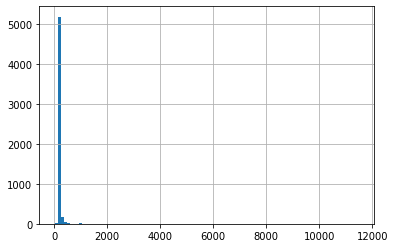

In [11]:
evlog_df.activity_duration_hrs.hist(bins=100)

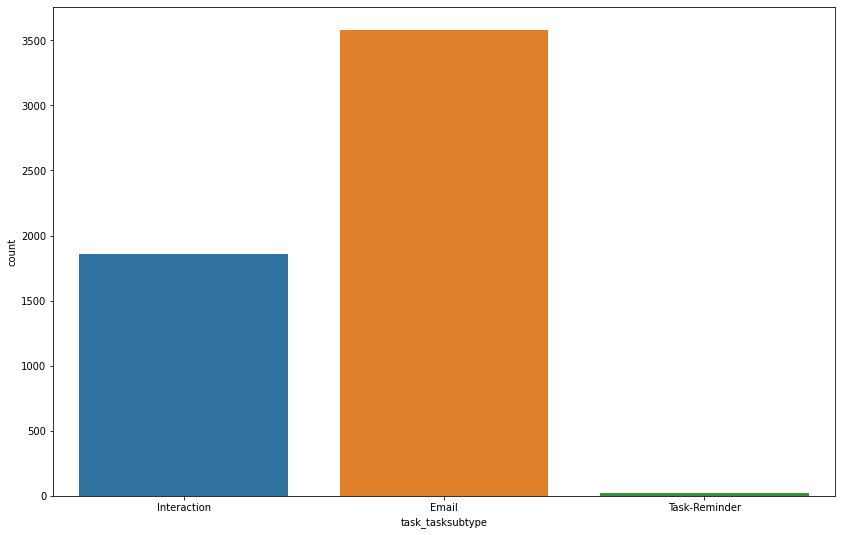

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 9))
ax = sns.countplot(x="task_tasksubtype", data=evlog_df)

<AxesSubplot:>

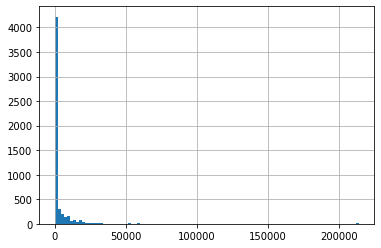

In [13]:
evlog_df.case_resolution_time__c.hist(bins=100)

## Inspection: cases looong activity durations

In [14]:
#day level
#sub = evlog_df.loc[evlog_df.activity_duration > 200]
#sub.head(20)

#from seconds to days
evlog_df["activity_duration_days"] = evlog_df.activity_duration_hrs/24

<ipython-input-14-d33b0ea724af>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evlog_df["activity_duration_days"] = evlog_df.activity_duration_hrs/24


<AxesSubplot:>

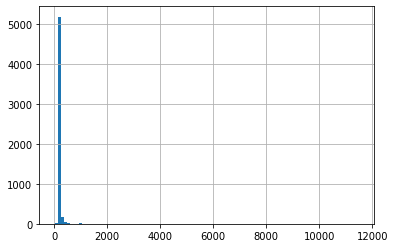

In [15]:
evlog_df.activity_duration_hrs.hist(bins=100)

<AxesSubplot:>

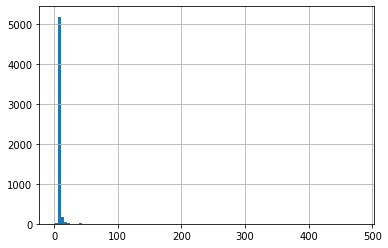

In [16]:
evlog_df.activity_duration_days.hist(bins=100)

##Filter out cases with long durations

threshold = 30
cases = []

for case in list(set(evlog_df.case_id)):
    sub = evlog_df.loc[evlog_df.case_id == case]
    if np.max(sub.activity_duration_days) <= threshold:
        cases.append(sub)

subset = pd.concat(cases,ignore_index=True)
subset = subset.drop_duplicates(subset=["case_id","task_id"])
print(len(df))
print(len(subset))

subset.activity_duration_days.hist(bins=100)

#Save filtered table for further analysis and modeling

subset.to_csv("train_evlog_activity_duration_filtered_sub30.csv",index=False)

# Save unfiltered table for further analysis and modeling

In [17]:
evlog_df.to_csv("Train_NPS_evlog_activity_duration.csv",index=False)

In [23]:
evlog_df.to_csv("../../../Analysis/1_activity_durations/Train_NPS_evlog_activity_duration.csv",index=False)